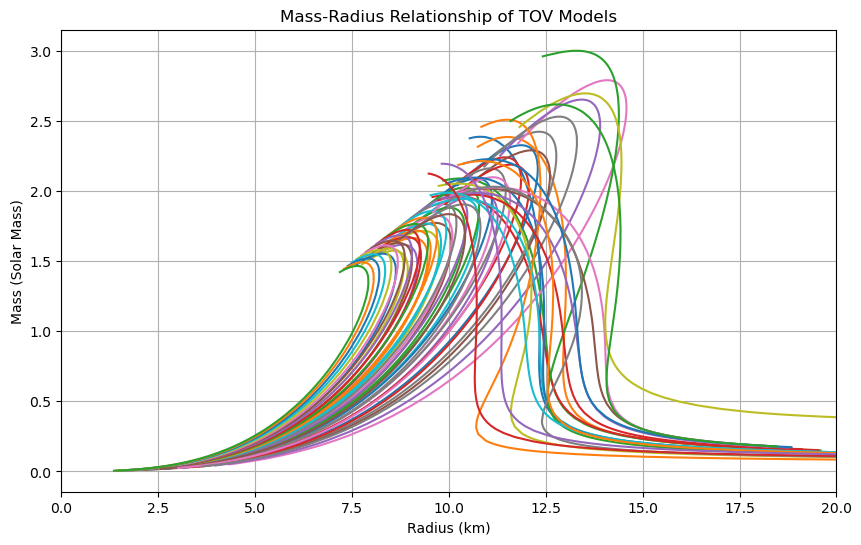

In [5]:
import os
import csv
import matplotlib.pyplot as plt

def read_csv_data(filename):
    masses = []
    radii = []
    with open(filename, "r") as f:
        reader = csv.reader(f)
        next(reader)  # Skip header
        for row in reader:
            try:
                mass, radius = float(row[0]), float(row[1])
                masses.append(mass)
                radii.append(radius)
            except ValueError:
                continue  # Skip invalid rows
    return masses, radii

def plot_mass_radius():
    plt.figure(figsize=(10, 6))

    for filename in os.listdir():
        if filename.startswith("TOV_results_") and filename.endswith(".csv"):
            model_name = filename.replace("TOV_results_", "").replace(".csv", "")
            masses, radii = read_csv_data(filename)
            if masses and radii:
                plt.plot(radii, masses, label=model_name, linestyle="-")
                plt.xlim(0,20)

    plt.xlabel("Radius (km)")
    plt.ylabel("Mass (Solar Mass)")
    plt.title("Mass-Radius Relationship of TOV Models")
    # plt.legend()
    plt.grid(True)
    
    plt.savefig("Figure_4.png")
    plt.show()
if __name__ == "__main__":
    plot_mass_radius()


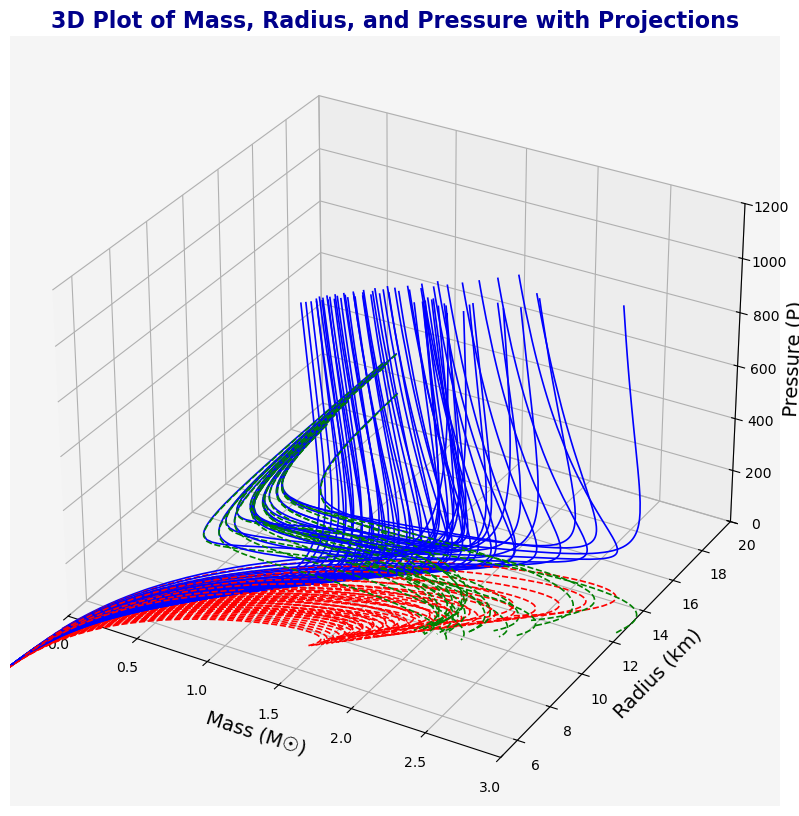

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv

# Function to read CSV data
def read_csv_data(filename):
    masses = []
    radii = []
    pressure = []
    types = []  # Store type values
    with open(filename, "r") as f:
        reader = csv.reader(f)
        next(reader)  # Skip header
        for row in reader:
            try:
                mass, radius, pressure_value, types_value = float(row[0]), float(row[1]), float(row[2]), float(row[3])
                if mass and  pressure_value and types_value >=0 and 0 <= radius <=25:
                    masses.append(mass)
                    radii.append(radius)
                    pressure.append(pressure_value)
                    types.append(types_value)
            except ValueError:
                continue  # Skip invalid rows
    return masses, radii, pressure, types


# Function to plot 3D data, and projections onto the M-R and P-R planes
def plot_3d(masses_all, radii_all, pressure_all, type_all):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Loop through all the datasets and plot them as lines with thin linewidth
    for masses, radii, pressure, types in zip(masses_all, radii_all, pressure_all, type_all):
        # 3D plot (Mass vs Radius vs Pressure)
        ax.plot(masses, radii, pressure, linestyle='-', color='b', linewidth=1.2, label='Data Curve')  # Thin solid blue line for 3D plot

        # Determine color for the projection based on the type
        if max(types) >= 1:  # If any type value is >= 1, use red for projection
            ax.plot(masses, radii, np.zeros_like(pressure), color='r', linewidth=1.2, linestyle='--', label='Projection (M-R)')
        else:  # Otherwise, use green for projection
            ax.plot(masses, radii, np.zeros_like(pressure), color='g', linewidth=1.2, linestyle='--', label='Projection (M-R)')

        # Projection onto the P-R (Pressure-Radius) plane (set Mass = 0)
        # ax.plot(np.zeros_like(radii), radii, pressure, color='y', linewidth=1.2, linestyle='-.', label='Projection (P-R)')

    # Set labels for the axes
    ax.set_xlabel('Mass (M☉)', fontsize=14)
    ax.set_ylabel('Radius (km)', fontsize=14)
    ax.set_zlabel('Pressure (P)', fontsize=14)

    # Set limits for the axes (Customize these based on your data range)
    ax.set_xlim([0, 3])  # Set X limits for Mass
    ax.set_ylim([5, 20])  # Set Y limits for Radius
    ax.set_zlim([0, max(max(pressure_all))])  # Set Z limits for Pressure (assuming pressure > 0)

    # Set grid for 3D plot with more subtle grid lines
    ax.grid(True, linewidth=0.5, linestyle=':', color='gray')  # Thin dotted grid lines for a cleaner look

    # Add a legend with better positioning
  

    # Set title with proper styling
    ax.set_title('3D Plot of Mass, Radius, and Pressure with Projections', fontsize=16, fontweight='bold', color='darkblue')

    # Make the background color lighter for contrast
    ax.set_facecolor('whitesmoke')  # Set background color for the 3D plot

    # Show the plot
    plt.show()


# Lists to store all datasets
masses_all = []
radii_all = []
pressure_all = []
type_all = []

# Loop through all files in the current directory
for filename in os.listdir('.'):
    if filename.startswith("TOV_results_") and filename.endswith(".csv"):
        masses, radii, pressure, types = read_csv_data(filename)
        if masses and radii and pressure and types:
            masses_all.append(masses)
            radii_all.append(radii)
            pressure_all.append(pressure)
            type_all.append(types)

# After collecting all datasets, plot them in one figure
plot_3d(masses_all, radii_all, pressure_all, type_all)
